In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import math

In [2]:
clustering1 = np.load('hw2_data/kmeans/clustering1.npy')
clustering2 = np.load('hw2_data/kmeans/clustering2.npy')
clustering3 = np.load('hw2_data/kmeans/clustering3.npy')
clustering4 = np.load('hw2_data/kmeans/clustering4.npy')


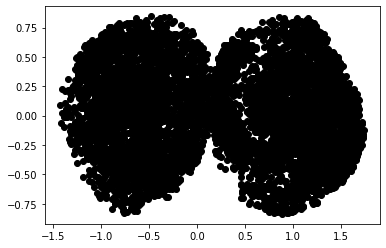

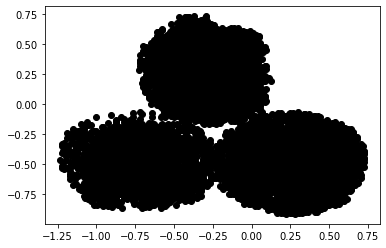

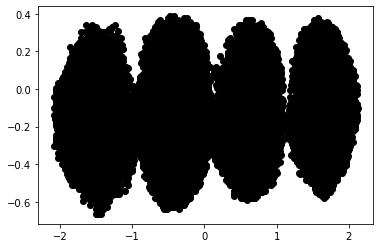

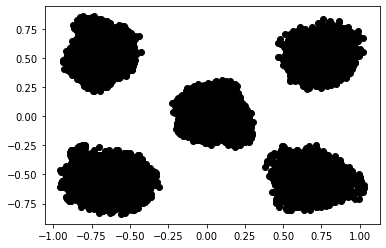

In [3]:
plt.plot(clustering1[:,0],clustering1[:,1],'ok')
plt.show()
plt.plot(clustering2[:,0],clustering2[:,1],'ok')
plt.show()
plt.plot(clustering3[:,0],clustering3[:,1],'ok')
plt.show()
plt.plot(clustering4[:,0],clustering4[:,1],'ok')
plt.show()

In [4]:
def getRandomCenters(howManyCenters,clustering):#DONE
    """
    returns an array of length howManyCenters from clustering, it is better to return different points but not important

    """
    res: np.ndarray = np.zeros((howManyCenters,2),float)
    for i in range(0,howManyCenters):
        res[i] = clustering[random.randint(0,len(clustering)-1)]
    return res

In [5]:
def findNearestCenterToEveryPoint(clusterCenters,clustering):#DONE needs #TEST
    """ 
    returns an array of length len(clustering). 
    In this array, every number(which is int), 
    represents the nearest cluster center to the point in clustering

    """
    res = np.zeros(len(clustering),int)
    for i in range (0,len(res)):
        distances: list = []        
        for j in range (0,len(clusterCenters)):
            distances.append(eucledien(clusterCenters[j],clustering[i]))
        #print(distances)
        #print("^^ distances")
        res[i] = distances.index(min(distances))
        
    return res

In [6]:
def findNewClusterCenters(howManyCenters: int,nearestCenters: list,clustering: list)->list:#DONE NEEDS TESTING
    """ 
    merkezi ayni olan noktalarin ortalamasini bulacaksin
    returns an array of length howManyCenters, which will carry the new Center's
    """
    res = np.zeros((howManyCenters,2),float)
    for i in range (0,howManyCenters):
        pointsNearToThisCenter = np.zeros((1,2))
        for j in range(0,len(nearestCenters)):
            k = nearestCenters[j]
            if(i == k):
                pointsNearToThisCenter = np.concatenate([pointsNearToThisCenter,[clustering[j]]  ])
        a = getCenterOfThePoints(pointsNearToThisCenter)
        b= np.array([a])#possible error
        res[i] =b


    return res

In [7]:
def findDifferenceBetweenOldAndNewClusterCenters(clusterCenters,newClusterCenters):
    """
    returns sum of differences of the center points one to one
    """
    res = 0.
    for i in range(0,len(clusterCenters)):
        res+=eucledien(clusterCenters[i],newClusterCenters[i])

    return res

In [8]:
def sumOfDistancesToClusterCenters(clustering,newClusterCenters,howManyCenters):#DONE needs test
    """
    returns the sum of the distances of points and their cluster centers
    """
    nearests = findNearestCenterToEveryPoint(newClusterCenters,clustering)
    res = 0.

    for j in range(0,len(nearests)):
        nearestCenterIndex = nearests[j]
        point = clustering[j]
        nearestCenter = newClusterCenters[nearestCenterIndex]
        res+=eucledien(nearestCenter,point)
        

    return res
def eucledien(point1:list,point2:list)-> float:#DONE
    """ Gives distance between two points """
    return math.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)
def getCenterOfThePoints(points):#DONE needs test
    #if(len(points[:0])==0):
        #zero = getRandomCenters(1,clustering)
    zero = sum(points[:,0]) / len(points)
    one = sum(points[:,1]) / len(points)
    res = np.zeros(2)
    res = [zero,one]
    return res

In [15]:
def MAINfindSumOfDistancesToClusterCenters(clustering,howManyCenters):
    threshold = 0.01
    #for 10 times
    howManyTimes = 30
    clusterCenters = getRandomCenters(howManyCenters,clustering)
    while(True):
        print("running "+str(howManyTimes)+" many times, with "+str(howManyCenters)+" centers")
        howManyTimes-=1
        nearestCenters = findNearestCenterToEveryPoint(clusterCenters,clustering)
        newClusterCenters = findNewClusterCenters(howManyCenters,nearestCenters,clustering)
        #plt.plot(clustering[:,0],clustering[:,1],'ok',clusterCenters[:,0],clusterCenters[:,1],'vb',newClusterCenters[:,0],newClusterCenters[:,1],'rs')
        #plt.show()
        if(findDifferenceBetweenOldAndNewClusterCenters(clusterCenters,newClusterCenters)<threshold or howManyTimes==0):
            plt.plot(clustering[:,0],clustering[:,1],'ok',clusterCenters[:,0],clusterCenters[:,1],'vb',newClusterCenters[:,0],newClusterCenters[:,1],'rs')
            plt.show()
            print("DONE")
            return sumOfDistancesToClusterCenters(clustering,newClusterCenters,howManyCenters)
        clusterCenters = newClusterCenters
    
    return

running 30 many times, with 1 centers
running 29 many times, with 1 centers


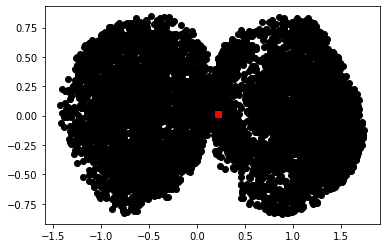

DONE
6546.4402090768135
running 30 many times, with 2 centers
running 29 many times, with 2 centers
running 28 many times, with 2 centers
running 27 many times, with 2 centers
running 26 many times, with 2 centers


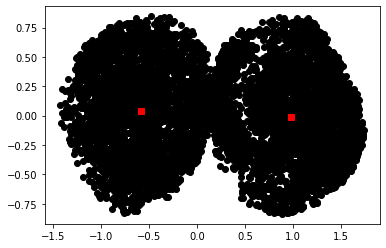

DONE
3637.0661524257766
running 30 many times, with 3 centers
running 29 many times, with 3 centers
running 28 many times, with 3 centers
running 27 many times, with 3 centers
running 26 many times, with 3 centers
running 25 many times, with 3 centers
running 24 many times, with 3 centers
running 23 many times, with 3 centers
running 22 many times, with 3 centers
running 21 many times, with 3 centers
running 20 many times, with 3 centers
running 19 many times, with 3 centers
running 18 many times, with 3 centers
running 17 many times, with 3 centers
running 16 many times, with 3 centers
running 15 many times, with 3 centers
running 14 many times, with 3 centers
running 13 many times, with 3 centers


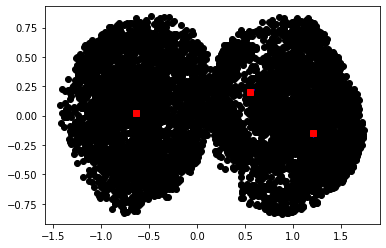

DONE
3172.360795915839
running 30 many times, with 4 centers
running 29 many times, with 4 centers
running 28 many times, with 4 centers
running 27 many times, with 4 centers
running 26 many times, with 4 centers
running 25 many times, with 4 centers
running 24 many times, with 4 centers
running 23 many times, with 4 centers
running 22 many times, with 4 centers


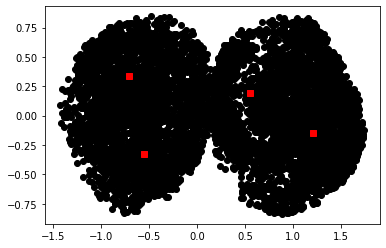

DONE
2746.6412163777977
running 30 many times, with 5 centers
running 29 many times, with 5 centers
running 28 many times, with 5 centers
running 27 many times, with 5 centers
running 26 many times, with 5 centers
running 25 many times, with 5 centers
running 24 many times, with 5 centers
running 23 many times, with 5 centers
running 22 many times, with 5 centers
running 21 many times, with 5 centers
running 20 many times, with 5 centers
running 19 many times, with 5 centers
running 18 many times, with 5 centers
running 17 many times, with 5 centers
running 16 many times, with 5 centers
running 15 many times, with 5 centers
running 14 many times, with 5 centers
running 13 many times, with 5 centers
running 12 many times, with 5 centers
running 11 many times, with 5 centers


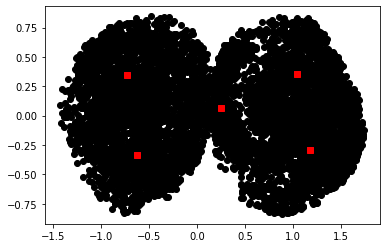

DONE
2447.7931335911067
running 30 many times, with 6 centers
running 29 many times, with 6 centers
running 28 many times, with 6 centers
running 27 many times, with 6 centers
running 26 many times, with 6 centers
running 25 many times, with 6 centers
running 24 many times, with 6 centers
running 23 many times, with 6 centers
running 22 many times, with 6 centers
running 21 many times, with 6 centers
running 20 many times, with 6 centers
running 19 many times, with 6 centers
running 18 many times, with 6 centers
running 17 many times, with 6 centers
running 16 many times, with 6 centers
running 15 many times, with 6 centers
running 14 many times, with 6 centers
running 13 many times, with 6 centers
running 12 many times, with 6 centers
running 11 many times, with 6 centers
running 10 many times, with 6 centers
running 9 many times, with 6 centers


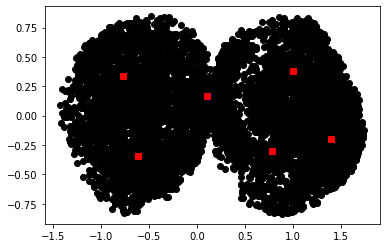

DONE
2239.5887517127685
running 30 many times, with 7 centers
running 29 many times, with 7 centers
running 28 many times, with 7 centers
running 27 many times, with 7 centers
running 26 many times, with 7 centers
running 25 many times, with 7 centers
running 24 many times, with 7 centers
running 23 many times, with 7 centers
running 22 many times, with 7 centers
running 21 many times, with 7 centers
running 20 many times, with 7 centers
running 19 many times, with 7 centers
running 18 many times, with 7 centers


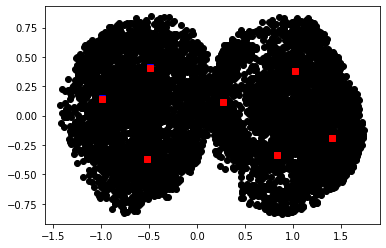

DONE
2084.303351926154
running 30 many times, with 8 centers
running 29 many times, with 8 centers
running 28 many times, with 8 centers
running 27 many times, with 8 centers
running 26 many times, with 8 centers
running 25 many times, with 8 centers
running 24 many times, with 8 centers
running 23 many times, with 8 centers
running 22 many times, with 8 centers
running 21 many times, with 8 centers
running 20 many times, with 8 centers
running 19 many times, with 8 centers


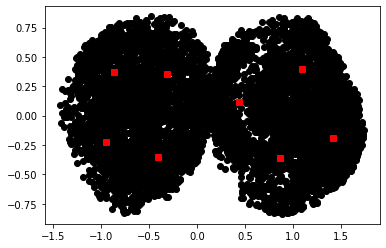

DONE
1969.5064116109868
running 30 many times, with 9 centers
running 29 many times, with 9 centers
running 28 many times, with 9 centers
running 27 many times, with 9 centers
running 26 many times, with 9 centers
running 25 many times, with 9 centers
running 24 many times, with 9 centers
running 23 many times, with 9 centers
running 22 many times, with 9 centers
running 21 many times, with 9 centers
running 20 many times, with 9 centers
running 19 many times, with 9 centers
running 18 many times, with 9 centers
running 17 many times, with 9 centers
running 16 many times, with 9 centers
running 15 many times, with 9 centers
running 14 many times, with 9 centers
running 13 many times, with 9 centers
running 12 many times, with 9 centers
running 11 many times, with 9 centers
running 10 many times, with 9 centers
running 9 many times, with 9 centers
running 8 many times, with 9 centers
running 7 many times, with 9 centers
running 6 many times, with 9 centers
running 5 many times, with 9 c

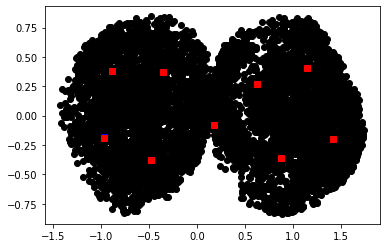

DONE
1849.923568556436
running 30 many times, with 10 centers
running 29 many times, with 10 centers
running 28 many times, with 10 centers
running 27 many times, with 10 centers
running 26 many times, with 10 centers
running 25 many times, with 10 centers
running 24 many times, with 10 centers
running 23 many times, with 10 centers
running 22 many times, with 10 centers
running 21 many times, with 10 centers
running 20 many times, with 10 centers
running 19 many times, with 10 centers
running 18 many times, with 10 centers
running 17 many times, with 10 centers
running 16 many times, with 10 centers
running 15 many times, with 10 centers
running 14 many times, with 10 centers
running 13 many times, with 10 centers
running 12 many times, with 10 centers
running 11 many times, with 10 centers
running 10 many times, with 10 centers
running 9 many times, with 10 centers
running 8 many times, with 10 centers
running 7 many times, with 10 centers
running 6 many times, with 10 centers
runnin

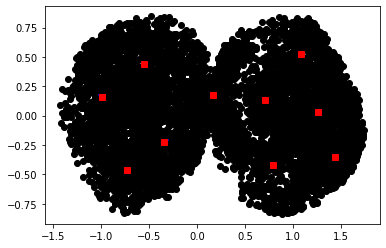

DONE
1782.4441461005474
DONE! result is
[6546.4402090768135, 3637.0661524257766, 3172.360795915839, 2746.6412163777977, 2447.7931335911067, 2239.5887517127685, 2084.303351926154, 1969.5064116109868, 1849.923568556436, 1782.4441461005474]


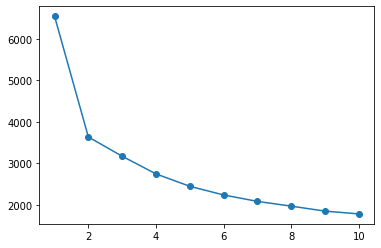

In [19]:
results = []

for i  in range(1,11):
    results.append(MAINfindSumOfDistancesToClusterCenters(clustering1,i))
    print(results[i-1])
print("DONE! result is")
xAxis = list(range(1,len(results)+1))
plt.plot(xAxis,results,marker = 'o')
print(results)

running 30 many times, with 1 centers
running 29 many times, with 1 centers


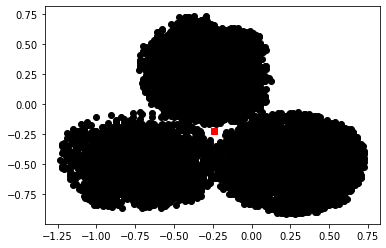

DONE
4333.009642241546
running 30 many times, with 2 centers
running 29 many times, with 2 centers
running 28 many times, with 2 centers
running 27 many times, with 2 centers


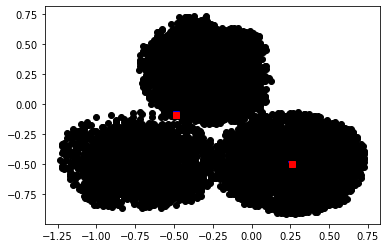

DONE
3135.756333218162
running 30 many times, with 3 centers
running 29 many times, with 3 centers
running 28 many times, with 3 centers
running 27 many times, with 3 centers


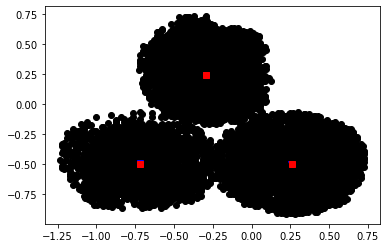

DONE
2020.1581180482397
running 30 many times, with 4 centers
running 29 many times, with 4 centers
running 28 many times, with 4 centers
running 27 many times, with 4 centers
running 26 many times, with 4 centers
running 25 many times, with 4 centers


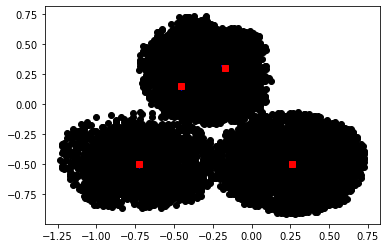

DONE
1874.1097046243997
running 30 many times, with 5 centers
running 29 many times, with 5 centers
running 28 many times, with 5 centers
running 27 many times, with 5 centers
running 26 many times, with 5 centers
running 25 many times, with 5 centers
running 24 many times, with 5 centers
running 23 many times, with 5 centers
running 22 many times, with 5 centers
running 21 many times, with 5 centers
running 20 many times, with 5 centers
running 19 many times, with 5 centers


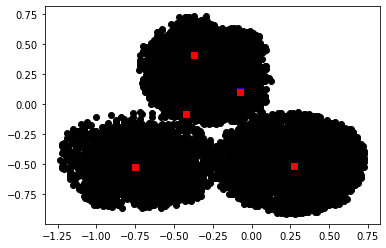

DONE
1717.0008200762113
running 30 many times, with 6 centers
running 29 many times, with 6 centers
running 28 many times, with 6 centers
running 27 many times, with 6 centers
running 26 many times, with 6 centers
running 25 many times, with 6 centers
running 24 many times, with 6 centers
running 23 many times, with 6 centers
running 22 many times, with 6 centers
running 21 many times, with 6 centers
running 20 many times, with 6 centers
running 19 many times, with 6 centers
running 18 many times, with 6 centers


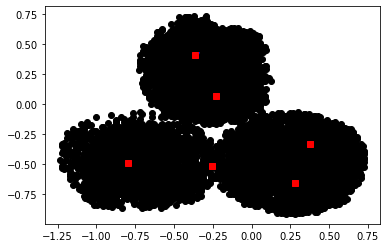

DONE
1569.6447286859318
running 30 many times, with 7 centers
running 29 many times, with 7 centers
running 28 many times, with 7 centers
running 27 many times, with 7 centers
running 26 many times, with 7 centers
running 25 many times, with 7 centers
running 24 many times, with 7 centers
running 23 many times, with 7 centers
running 22 many times, with 7 centers
running 21 many times, with 7 centers
running 20 many times, with 7 centers
running 19 many times, with 7 centers
running 18 many times, with 7 centers


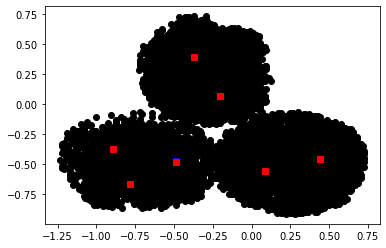

DONE
1476.5180475818904
running 30 many times, with 8 centers
running 29 many times, with 8 centers
running 28 many times, with 8 centers
running 27 many times, with 8 centers
running 26 many times, with 8 centers
running 25 many times, with 8 centers
running 24 many times, with 8 centers
running 23 many times, with 8 centers
running 22 many times, with 8 centers
running 21 many times, with 8 centers
running 20 many times, with 8 centers
running 19 many times, with 8 centers
running 18 many times, with 8 centers
running 17 many times, with 8 centers
running 16 many times, with 8 centers
running 15 many times, with 8 centers
running 14 many times, with 8 centers
running 13 many times, with 8 centers
running 12 many times, with 8 centers
running 11 many times, with 8 centers
running 10 many times, with 8 centers
running 9 many times, with 8 centers
running 8 many times, with 8 centers
running 7 many times, with 8 centers
running 6 many times, with 8 centers
running 5 many times, with 8 c

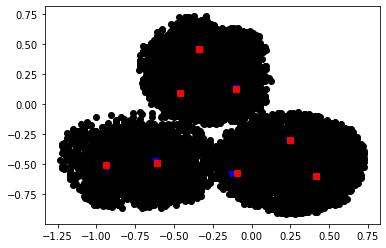

DONE
1338.7089571896454
running 30 many times, with 9 centers
running 29 many times, with 9 centers
running 28 many times, with 9 centers
running 27 many times, with 9 centers
running 26 many times, with 9 centers
running 25 many times, with 9 centers
running 24 many times, with 9 centers
running 23 many times, with 9 centers
running 22 many times, with 9 centers
running 21 many times, with 9 centers
running 20 many times, with 9 centers
running 19 many times, with 9 centers
running 18 many times, with 9 centers
running 17 many times, with 9 centers
running 16 many times, with 9 centers
running 15 many times, with 9 centers
running 14 many times, with 9 centers


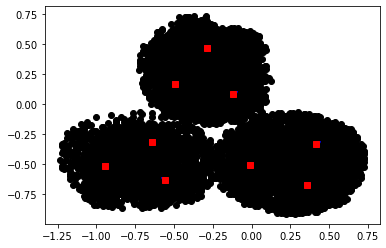

DONE
1255.3195291035358
running 30 many times, with 10 centers
running 29 many times, with 10 centers
running 28 many times, with 10 centers
running 27 many times, with 10 centers
running 26 many times, with 10 centers
running 25 many times, with 10 centers
running 24 many times, with 10 centers
running 23 many times, with 10 centers
running 22 many times, with 10 centers
running 21 many times, with 10 centers
running 20 many times, with 10 centers
running 19 many times, with 10 centers
running 18 many times, with 10 centers
running 17 many times, with 10 centers
running 16 many times, with 10 centers
running 15 many times, with 10 centers
running 14 many times, with 10 centers
running 13 many times, with 10 centers
running 12 many times, with 10 centers
running 11 many times, with 10 centers
running 10 many times, with 10 centers
running 9 many times, with 10 centers
running 8 many times, with 10 centers
running 7 many times, with 10 centers
running 6 many times, with 10 centers
runni

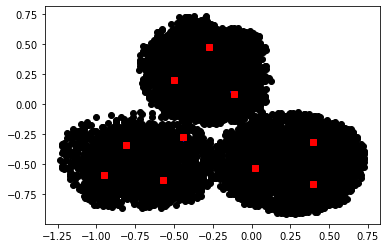

DONE
1217.7360940592114
DONE! result is
[4333.009642241546, 3135.756333218162, 2020.1581180482397, 1874.1097046243997, 1717.0008200762113, 1569.6447286859318, 1476.5180475818904, 1338.7089571896454, 1255.3195291035358, 1217.7360940592114]


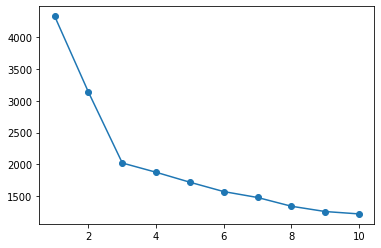

In [18]:
results = []

for i  in range(1,11):
    results.append(MAINfindSumOfDistancesToClusterCenters(clustering2,i))
    print(results[i-1])
print("DONE! result is")
print(results)
xAxis = list(range(1,len(results)+1))
plt.plot(xAxis,results,marker = 'o')
plt.show()

running 30 many times, with 1 centers
running 29 many times, with 1 centers


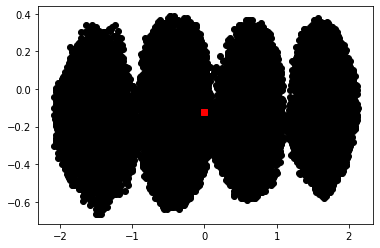

DONE
15202.234231634195
running 30 many times, with 2 centers
running 29 many times, with 2 centers
running 28 many times, with 2 centers
running 27 many times, with 2 centers


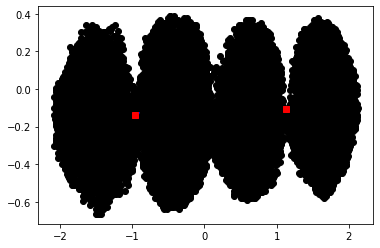

DONE
8191.176013673052
running 30 many times, with 3 centers
running 29 many times, with 3 centers
running 28 many times, with 3 centers
running 27 many times, with 3 centers


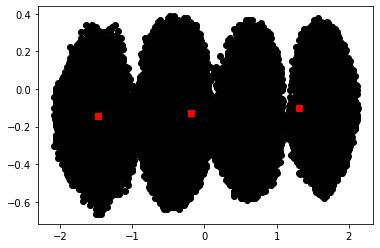

DONE
5845.567343762862
running 30 many times, with 4 centers
running 29 many times, with 4 centers
running 28 many times, with 4 centers
running 27 many times, with 4 centers


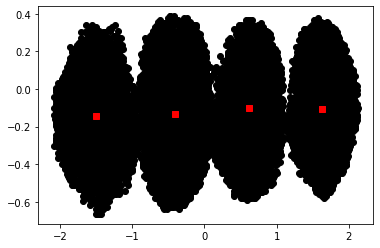

DONE
4176.867259146897
running 30 many times, with 5 centers
running 29 many times, with 5 centers
running 28 many times, with 5 centers
running 27 many times, with 5 centers
running 26 many times, with 5 centers
running 25 many times, with 5 centers
running 24 many times, with 5 centers
running 23 many times, with 5 centers
running 22 many times, with 5 centers


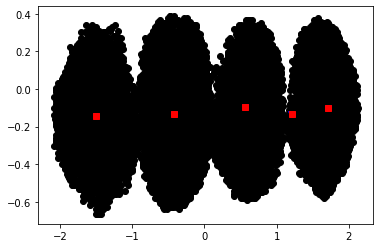

DONE
4018.9053336484935
running 30 many times, with 6 centers
running 29 many times, with 6 centers
running 28 many times, with 6 centers
running 27 many times, with 6 centers
running 26 many times, with 6 centers
running 25 many times, with 6 centers
running 24 many times, with 6 centers
running 23 many times, with 6 centers
running 22 many times, with 6 centers
running 21 many times, with 6 centers
running 20 many times, with 6 centers
running 19 many times, with 6 centers
running 18 many times, with 6 centers
running 17 many times, with 6 centers
running 16 many times, with 6 centers


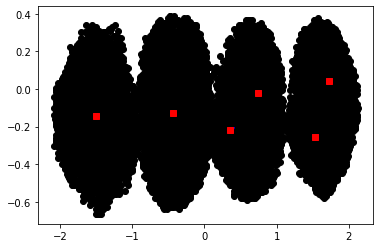

DONE
3764.68573112745
running 30 many times, with 7 centers
running 29 many times, with 7 centers
running 28 many times, with 7 centers
running 27 many times, with 7 centers
running 26 many times, with 7 centers
running 25 many times, with 7 centers
running 24 many times, with 7 centers
running 23 many times, with 7 centers
running 22 many times, with 7 centers
running 21 many times, with 7 centers
running 20 many times, with 7 centers
running 19 many times, with 7 centers
running 18 many times, with 7 centers
running 17 many times, with 7 centers
running 16 many times, with 7 centers
running 15 many times, with 7 centers
running 14 many times, with 7 centers
running 13 many times, with 7 centers
running 12 many times, with 7 centers
running 11 many times, with 7 centers
running 10 many times, with 7 centers
running 9 many times, with 7 centers
running 8 many times, with 7 centers


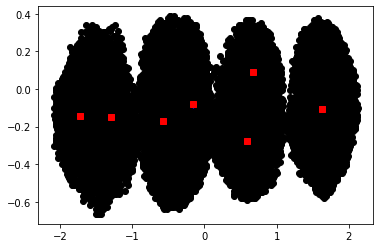

DONE
3444.643797831286
running 30 many times, with 8 centers
running 29 many times, with 8 centers
running 28 many times, with 8 centers
running 27 many times, with 8 centers
running 26 many times, with 8 centers
running 25 many times, with 8 centers
running 24 many times, with 8 centers
running 23 many times, with 8 centers
running 22 many times, with 8 centers
running 21 many times, with 8 centers
running 20 many times, with 8 centers
running 19 many times, with 8 centers
running 18 many times, with 8 centers
running 17 many times, with 8 centers
running 16 many times, with 8 centers
running 15 many times, with 8 centers
running 14 many times, with 8 centers
running 13 many times, with 8 centers
running 12 many times, with 8 centers
running 11 many times, with 8 centers
running 10 many times, with 8 centers
running 9 many times, with 8 centers
running 8 many times, with 8 centers
running 7 many times, with 8 centers
running 6 many times, with 8 centers
running 5 many times, with 8 ce

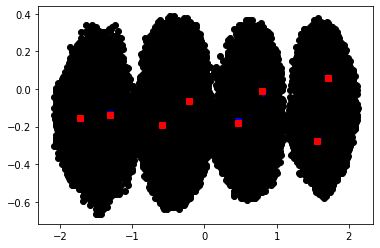

DONE
3247.765126641685
running 30 many times, with 9 centers
running 29 many times, with 9 centers
running 28 many times, with 9 centers
running 27 many times, with 9 centers
running 26 many times, with 9 centers
running 25 many times, with 9 centers
running 24 many times, with 9 centers
running 23 many times, with 9 centers
running 22 many times, with 9 centers
running 21 many times, with 9 centers
running 20 many times, with 9 centers
running 19 many times, with 9 centers
running 18 many times, with 9 centers
running 17 many times, with 9 centers
running 16 many times, with 9 centers
running 15 many times, with 9 centers
running 14 many times, with 9 centers
running 13 many times, with 9 centers
running 12 many times, with 9 centers
running 11 many times, with 9 centers
running 10 many times, with 9 centers
running 9 many times, with 9 centers
running 8 many times, with 9 centers
running 7 many times, with 9 centers
running 6 many times, with 9 centers
running 5 many times, with 9 ce

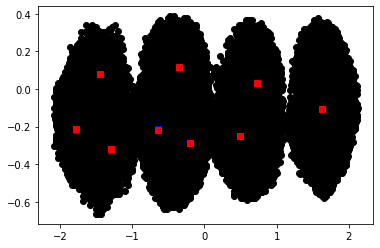

DONE
3085.6153369224153
running 30 many times, with 10 centers
running 29 many times, with 10 centers
running 28 many times, with 10 centers
running 27 many times, with 10 centers
running 26 many times, with 10 centers
running 25 many times, with 10 centers
running 24 many times, with 10 centers
running 23 many times, with 10 centers
running 22 many times, with 10 centers
running 21 many times, with 10 centers
running 20 many times, with 10 centers
running 19 many times, with 10 centers
running 18 many times, with 10 centers
running 17 many times, with 10 centers
running 16 many times, with 10 centers
running 15 many times, with 10 centers
running 14 many times, with 10 centers
running 13 many times, with 10 centers
running 12 many times, with 10 centers
running 11 many times, with 10 centers
running 10 many times, with 10 centers
running 9 many times, with 10 centers
running 8 many times, with 10 centers
running 7 many times, with 10 centers
running 6 many times, with 10 centers
runni

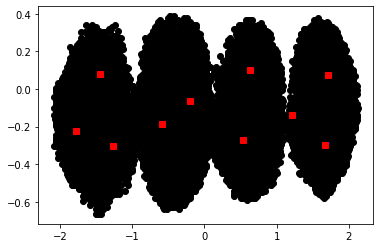

DONE
2907.927395763869
DONE! result is
[15202.234231634195, 8191.176013673052, 5845.567343762862, 4176.867259146897, 4018.9053336484935, 3764.68573112745, 3444.643797831286, 3247.765126641685, 3085.6153369224153, 2907.927395763869]


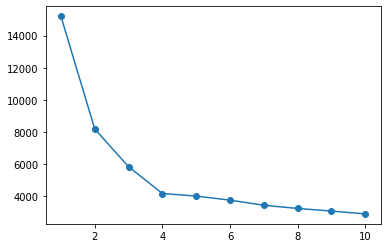

In [16]:
results = []

for i  in range(1,11):
    results.append(MAINfindSumOfDistancesToClusterCenters(clustering3,i))
    print(results[i-1])
print("DONE! result is")
print(results)
xAxis = list(range(1,len(results)+1))
plt.plot(xAxis,results,marker = 'o')
plt.show()

running 30 many times, with 1 centers
running 29 many times, with 1 centers


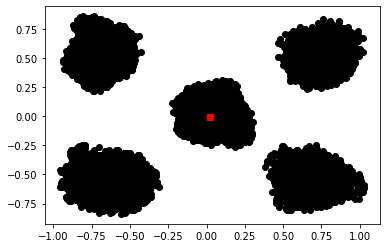

DONE
9057.5308957189
running 30 many times, with 2 centers
running 29 many times, with 2 centers
running 28 many times, with 2 centers
running 27 many times, with 2 centers
running 26 many times, with 2 centers


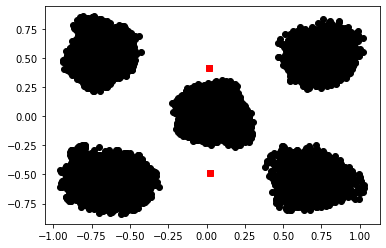

DONE
7793.852798561443
running 30 many times, with 3 centers
running 29 many times, with 3 centers
running 28 many times, with 3 centers
running 27 many times, with 3 centers
running 26 many times, with 3 centers
running 25 many times, with 3 centers
running 24 many times, with 3 centers
running 23 many times, with 3 centers
running 22 many times, with 3 centers
running 21 many times, with 3 centers


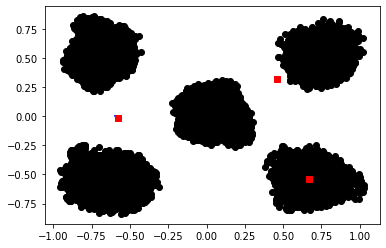

DONE
5324.53269592865
running 30 many times, with 4 centers
running 29 many times, with 4 centers
running 28 many times, with 4 centers
running 27 many times, with 4 centers
running 26 many times, with 4 centers
running 25 many times, with 4 centers
running 24 many times, with 4 centers


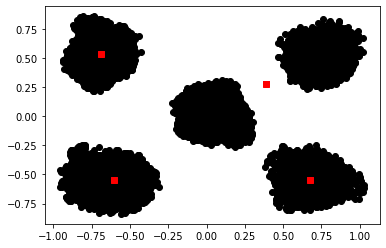

DONE
3330.421427946654
running 30 many times, with 5 centers
running 29 many times, with 5 centers
running 28 many times, with 5 centers
running 27 many times, with 5 centers
running 26 many times, with 5 centers
running 25 many times, with 5 centers
running 24 many times, with 5 centers
running 23 many times, with 5 centers
running 22 many times, with 5 centers
running 21 many times, with 5 centers
running 20 many times, with 5 centers
running 19 many times, with 5 centers


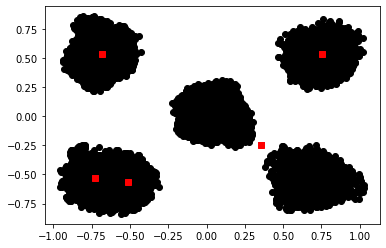

DONE
3242.8541750535464
running 30 many times, with 6 centers
running 29 many times, with 6 centers
running 28 many times, with 6 centers
running 27 many times, with 6 centers
running 26 many times, with 6 centers
running 25 many times, with 6 centers
running 24 many times, with 6 centers
running 23 many times, with 6 centers
running 22 many times, with 6 centers
running 21 many times, with 6 centers
running 20 many times, with 6 centers
running 19 many times, with 6 centers
running 18 many times, with 6 centers
running 17 many times, with 6 centers
running 16 many times, with 6 centers


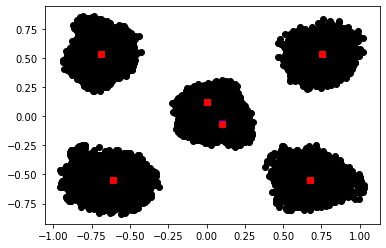

DONE
1760.7329584702743
running 30 many times, with 7 centers
running 29 many times, with 7 centers
running 28 many times, with 7 centers
running 27 many times, with 7 centers
running 26 many times, with 7 centers
running 25 many times, with 7 centers
running 24 many times, with 7 centers


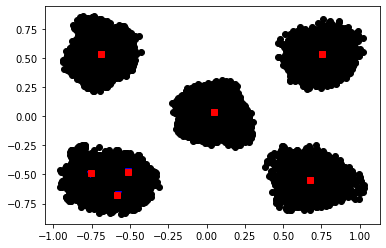

DONE
1706.8503684092186
running 30 many times, with 8 centers
running 29 many times, with 8 centers
running 28 many times, with 8 centers
running 27 many times, with 8 centers
running 26 many times, with 8 centers
running 25 many times, with 8 centers
running 24 many times, with 8 centers
running 23 many times, with 8 centers
running 22 many times, with 8 centers
running 21 many times, with 8 centers


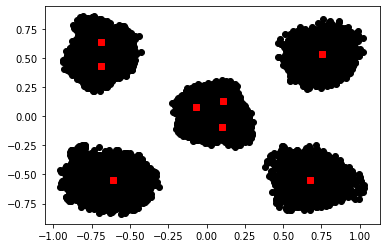

DONE
1621.5606513030518
running 30 many times, with 9 centers
running 29 many times, with 9 centers
running 28 many times, with 9 centers
running 27 many times, with 9 centers
running 26 many times, with 9 centers
running 25 many times, with 9 centers
running 24 many times, with 9 centers
running 23 many times, with 9 centers
running 22 many times, with 9 centers
running 21 many times, with 9 centers
running 20 many times, with 9 centers
running 19 many times, with 9 centers
running 18 many times, with 9 centers
running 17 many times, with 9 centers
running 16 many times, with 9 centers
running 15 many times, with 9 centers
running 14 many times, with 9 centers
running 13 many times, with 9 centers
running 12 many times, with 9 centers
running 11 many times, with 9 centers
running 10 many times, with 9 centers
running 9 many times, with 9 centers
running 8 many times, with 9 centers


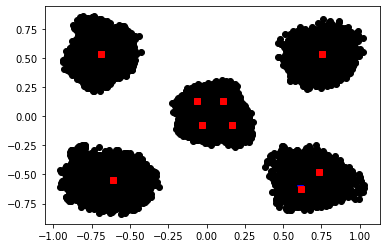

DONE
1600.8328905768376
running 30 many times, with 10 centers
running 29 many times, with 10 centers
running 28 many times, with 10 centers
running 27 many times, with 10 centers
running 26 many times, with 10 centers
running 25 many times, with 10 centers
running 24 many times, with 10 centers
running 23 many times, with 10 centers
running 22 many times, with 10 centers
running 21 many times, with 10 centers
running 20 many times, with 10 centers
running 19 many times, with 10 centers
running 18 many times, with 10 centers
running 17 many times, with 10 centers
running 16 many times, with 10 centers
running 15 many times, with 10 centers
running 14 many times, with 10 centers
running 13 many times, with 10 centers
running 12 many times, with 10 centers
running 11 many times, with 10 centers
running 10 many times, with 10 centers
running 9 many times, with 10 centers
running 8 many times, with 10 centers
running 7 many times, with 10 centers
running 6 many times, with 10 centers
runni

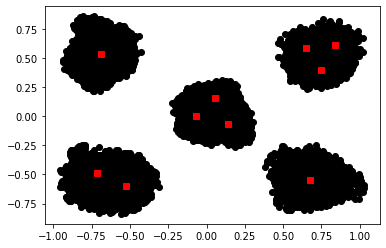

DONE
1491.9876592701933
DONE! result is
[9057.5308957189, 7793.852798561443, 5324.53269592865, 3330.421427946654, 3242.8541750535464, 1760.7329584702743, 1706.8503684092186, 1621.5606513030518, 1600.8328905768376, 1491.9876592701933]


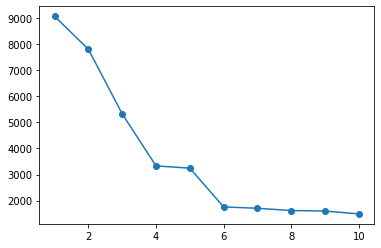

In [17]:
results = []

for i  in range(1,11):
    results.append(MAINfindSumOfDistancesToClusterCenters(clustering4,i))
    print(results[i-1])
print("DONE! result is")
print(results)
xAxis = list(range(1,len(results)+1))
plt.plot(xAxis,results,marker = 'o')
plt.show()

In [14]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]